In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec
import sklearn

### Line Search Newton's Method

In [16]:
def f(x):
    return 0.2 * np.square(x) - np.sin(x)

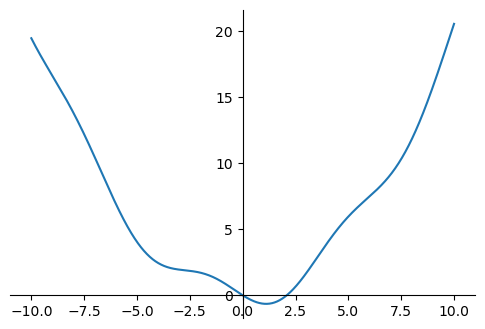

In [19]:
x = np.linspace(-10, 10, 1000)

# Create a figure and an axis
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
ax.plot(x, f(x))
ax.spines['bottom'].set_position('zero') # Y-axis
ax.spines['left'].set_position('zero')   # Z-axis (front spine)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

